### Monte Carlo Simulation with Python

Notebook to accompany article on [Practical Business Python](https://pbpython.com/monte-carlo.html)

Update to use numpy for faster loops based on comments [here](https://www.reddit.com/r/Python/comments/arxwkm/monte_carlo_simulation_with_python/)

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
sns.set_style('whitegrid')

In [28]:
# Define the variables for the Percent to target based on historical results
avg = .03
std_dev = .01
num_reps = 500
num_simulations = 100000

In [29]:
# Show an example of calculating the percent to target
pct_to_target = np.random.normal(
    avg,
    std_dev,
    size=(num_reps, num_simulations)
)

In [30]:
pct_to_target[0:10]

array([[0.00955738, 0.0356221 , 0.01470074, ..., 0.04542073, 0.02959123,
        0.04529886],
       [0.02850045, 0.03768146, 0.02849999, ..., 0.03232985, 0.02766391,
        0.05120255],
       [0.02404949, 0.00772565, 0.02695538, ..., 0.02759688, 0.02398577,
        0.02162014],
       ...,
       [0.04246436, 0.03232035, 0.05283658, ..., 0.02416363, 0.02299518,
        0.01695895],
       [0.02944979, 0.01970927, 0.03355772, ..., 0.04037812, 0.02092083,
        0.0258934 ],
       [0.03236743, 0.02624982, 0.01755665, ..., 0.02538961, 0.03120609,
        0.025772  ]])

In [31]:
# Another example for the sales target distribution
sales_target_values = [.02,.04,-.02,.06,.07,-.04]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, p=sales_target_prob, 
                                size=(num_reps, num_simulations))

In [32]:
sales_target[0:10]

array([[ 0.06,  0.04,  0.04, ...,  0.02, -0.02,  0.02],
       [-0.02,  0.07,  0.04, ...,  0.02,  0.06,  0.04],
       [ 0.04, -0.02,  0.04, ..., -0.02, -0.02,  0.07],
       ...,
       [ 0.06, -0.04,  0.06, ...,  0.06,  0.04, -0.02],
       [ 0.04,  0.06,  0.07, ..., -0.02,  0.04, -0.02],
       [ 0.04,  0.02,  0.04, ...,  0.02,  0.06,  0.04]])

In [33]:
commission_percentages = np.take(
    np.array([0.02, 0.03, 0.04]),
    np.digitize(pct_to_target, bins=[.9, .99, 10])
)

In [34]:
commission_percentages[0:10]

array([[0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02]])

In [35]:
total_commissions = (commission_percentages * sales_target).sum(axis=0)

In [36]:
total_commissions.std()

0.01343551800171476

In [37]:
# Show how to create the dataframe
df = pd.DataFrame(data={'Total_Commissions': total_commissions})
df.head()

,Total_Commissions
0,0.2202
1,0.2028
2,0.2026
3,0.2062
4,0.2034


<AxesSubplot:title={'center':'Commissions Distribution'}, ylabel='Frequency'>

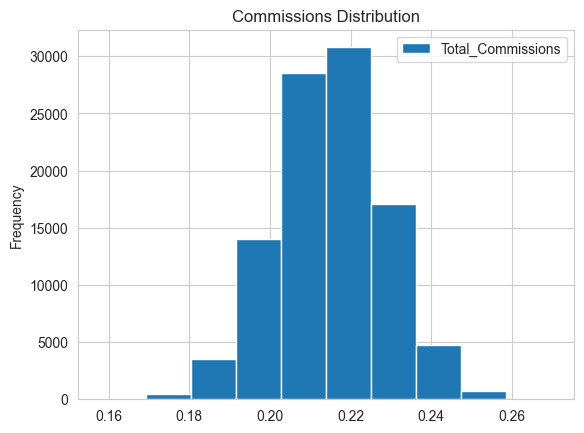

In [38]:
df.plot(kind='hist', title='Commissions Distribution')

In [39]:
df.describe()

,Total_Commissions
count,100000.000000
mean,0.214990
std,0.013436
min,0.158000
25%,0.206000
50%,0.215000
75%,0.224200
max,0.269800
